##### Bashir Alam
##### Assignment 4


<p><b>Question-1</b><hr>a) The comma in the numbers must be replaced by a point<hr>
b) The sales volume has sometimes an M and sometimes a K. this will prohibit the use of numbers as
numbers, so we must replace, for example, 1.57M by 1560000 or 4.56K by 456000<hr>
c) We want to add a column that contains positive or negative as a function of variation.<hr>
d) Change column names to English<hr>
e) The date is in European format we must change the date to appear 04-12-2021 that is day, month and
year (NOTE dates and times are manipulated with formats. look for information about timestamp in
pandas)<hr>

1- Write a function to correct these points and save the file with the name of cttcorrcted.csv</p>

In [50]:
import pandas as pd

data = pd.read_csv("CTT10.csv")

data.head()

,Data,Último,Abertura,Alta,Baixa,Vol.,Var. %
0,12.04.2021,"3,50","3,57","3,64","3,46","1,57M","-1,55%"
1,09.04.2021,"3,56","3,52","3,57","3,52","666,03K","1,14%"
2,08.04.2021,"3,52","3,45","3,54","3,45","882,54K","1,59%"
3,07.04.2021,"3,46","3,43","3,49","3,43","508,33K","0,87%"
4,06.04.2021,"3,43","3,44","3,49","3,43","809,46K","0,59%"


In [51]:
# this function converts the K and M value into numeric values 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0



def question1(dataframe):    
    # removing commas from the dataframe
    for col in dataframe.columns:
        dataframe[col] = dataframe[col].replace(",", ".", regex=True)
    
    # changing k and M into numbers
    dataframe['Vol.'] = dataframe['Vol.'].apply(value_to_float)
    
    
    
    # adding a column that contains negative or positive
    dataframe['Var. %'] = dataframe['Var. %'].str.replace('%','')
    dataframe['Var. %'] = dataframe['Var. %'].astype('float')
    dataframe.loc[dataframe['Var. %'] < 0, 'New_column'] = 'Negative' 
    dataframe.loc[dataframe['Var. %'] >= 0, 'New_column'] = 'Positive' 
    
    #remaning the column name
    dataframe.rename(columns = {'Data':'Date', "Último":"Last", "Abertura":"Open", "Alta": "High","Baixa":"Low", "Vol.": "Vol.","Var. %":"Var. %"}, inplace = True)
    
    
    #changing the date format
    dataframe["Date"] = dataframe["Date"].astype('datetime64[ns]')
    dataframe['Date'] = dataframe['Date'].dt.strftime('%d.%m.%Y')
    
    return dataframe

In [52]:
Ndata = question1(data)

/tmp/ipykernel_251596/2288086892.py:38: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe["Date"] = dataframe["Date"].astype('datetime64[ns]')


In [53]:
Ndata.head()

,Date,Last,Open,High,Low,Vol.,Var. %,New_column
0,04.12.2021,3.50,3.57,3.64,3.46,1570000.0,-1.55,Negative
1,04.09.2021,3.56,3.52,3.57,3.52,666030.0,1.14,Positive
2,04.08.2021,3.52,3.45,3.54,3.45,882540.0,1.59,Positive
3,04.07.2021,3.46,3.43,3.49,3.43,508330.0,0.87,Positive
4,04.06.2021,3.43,3.44,3.49,3.43,809460.0,0.59,Positive


<p><b>Question-2</b><hr>What was the date with the highest volatility (difference between min and max)</p>

In [54]:
# Calculating the daily returns of from the stock market
Ndata['Last'] = Ndata['Last'].astype(float)
Ndata['daily_returns']=(Ndata['Last'].pct_change())

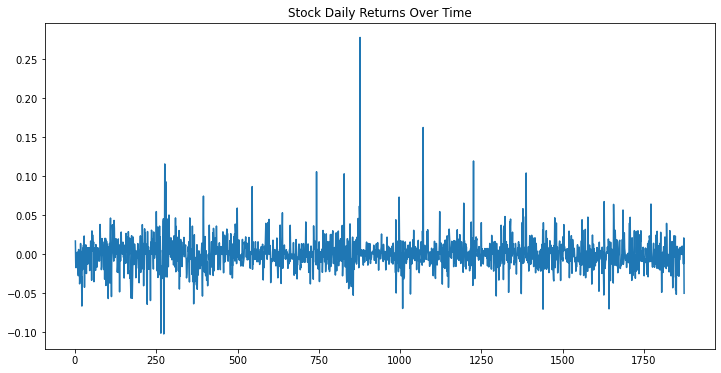

In [55]:
# plotting the daily return which was achieved above
import matplotlib.pyplot as plt
data.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
plt.plot(Ndata['daily_returns'], label = 'Daily Returns')

plt.title('Stock Daily Returns Over Time')
plt.show()


In [56]:
# Now, we will vaculate the volitality of data per day 

In [57]:
import math
daily_volatility_pfe = Ndata['daily_returns'].std()
print('Daily volatility:')
print((daily_volatility_pfe))

Daily volatility:
0.02044928330879462


In [58]:
Ndata.head()

,Date,Last,Open,High,Low,Vol.,Var. %,New_column,daily_returns
1,04.09.2021,3.56,3.52,3.57,3.52,666030.0,1.14,Positive,0.017143
2,04.08.2021,3.52,3.45,3.54,3.45,882540.0,1.59,Positive,-0.011236
3,04.07.2021,3.46,3.43,3.49,3.43,508330.0,0.87,Positive,-0.017045
4,04.06.2021,3.43,3.44,3.49,3.43,809460.0,0.59,Positive,-0.008671
5,04.01.2021,3.41,3.36,3.42,3.36,416710.0,1.19,Positive,-0.005831


In [59]:
# only year with heighest daily volitality
Ndata.nlargest(1, ['daily_returns'])

,Date,Last,Open,High,Low,Vol.,Var. %,New_column,daily_returns
877,31.10.2017,5.06,5.09,5.10,5.03,466580.0,-0.2,Negative,0.277778


In [60]:
# finding the exact date for the heighest daily volitality
Ndata.nlargest(1, ['daily_returns']).Date

877    31.10.2017
Name: Date, dtype: object

<p><b>Question-3</b><hr>What was the best month (30 days) during the 10 years to win with this title This means if I had to
keep my stock only 30 days when was the best 30 days?</p>

In [61]:
# To find the best month, I will use monthly volitality returns

In [62]:
# pct_change(30) means it will calculate the difference btw 30 rows
Ndata['monthly_returns']=(Ndata['Last'].pct_change(30))

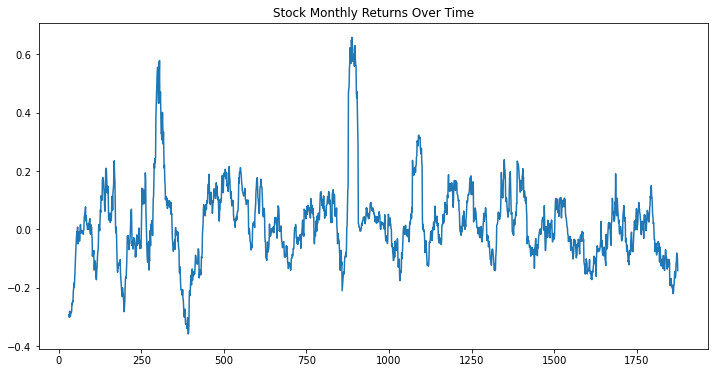

In [63]:
# plotting the daily return which was achieved above
import matplotlib.pyplot as plt
data.dropna(inplace=True)
fig,ax=plt.subplots(figsize=(12,6))
plt.plot(Ndata['monthly_returns'], label = 'Monthly Returns')

plt.title('Stock Monthly Returns Over Time')
plt.show()

In [64]:
# only year with heighest daily volitality
Ndata.nlargest(1, ['monthly_returns'])

,Date,Last,Open,High,Low,Vol.,Var. %,New_column,daily_returns,monthly_returns
888,16.10.2017,5.04,5.06,5.06,5.00,388010.0,0.0,Positive,0.005988,0.657895


In [65]:
Ndata.nlargest(1, ['monthly_returns']).Date

888    16.10.2017
Name: Date, dtype: object

<p><b>Question-4</b><hr>What was the duration of the longest sequence of ascent of the title in the closings?</p>

In [66]:
Ndata.head()

,Date,Last,Open,High,Low,Vol.,Var. %,New_column,daily_returns,monthly_returns
31,24.02.2021,2.52,2.46,2.52,2.45,475090.0,2.23,Positive,0.003984,-0.292135
32,23.02.2021,2.46,2.48,2.52,2.43,469140.0,-1.00,Negative,-0.023810,-0.301136
33,22.02.2021,2.49,2.45,2.49,2.41,390810.0,1.43,Positive,0.012195,-0.280347
34,19.02.2021,2.45,2.41,2.45,2.38,533430.0,2.72,Positive,-0.016064,-0.285714
35,18.02.2021,2.39,2.40,2.41,2.37,297330.0,0.00,Positive,-0.024490,-0.299120


In [67]:
Ndata = Ndata.sort_index(ascending=False)

In [68]:
Ndata.head()

,Date,Last,Open,High,Low,Vol.,Var. %,New_column,daily_returns,monthly_returns
1874,12.06.2013,5.53,5.58,5.59,5.51,4290000.0,-0.18,Negative,-0.049828,-0.141304
1873,12.09.2013,5.82,5.53,5.82,5.52,5800000.0,5.24,Positive,0.021053,-0.096273
1872,12.10.2013,5.70,5.74,5.79,5.70,1430000.0,-2.06,Negative,-0.012132,-0.093800
1871,12.11.2013,5.77,5.69,5.79,5.67,1370000.0,1.23,Positive,0.005226,-0.081210
1870,12.12.2013,5.74,5.75,5.76,5.71,725190.0,-0.52,Negative,0.000000,-0.112828


In [69]:
# applying get_value() function
starting_date = Ndata.iloc[0, 0]


count = 0
max_count = 0
for i in range(len(Ndata)-1):
    if Ndata.iloc[i, 8] - Ndata.iloc[i+1, 8] <=0:
        count+=1
    else:
        if count > max_count:
            ending_date = Ndata.iloc[i, 0]
            starting_date1 = starting_date
            max_count = count
            count = 0
        else:
            count = 0
            starting_date = Ndata.iloc[i, 0]

In [70]:
starting_date1

'08.05.2016'

In [71]:
ending_date

'16.08.2016'

This shows that from 06.07.2018 to 06.08.2020, the market was going up

<p><b>Question-5</b><hr>What was the date that saw the greatest turmoil in the market, ie large volumes with important
variations? You can choose for example volume * (max-min) to get a measure of turbulence).</p>

In [37]:
# I will use facebook prophet to detect the abrupt changes in market. 

In [38]:
# I will use only two columns of the data, and i will remove all others becuase for facebook model, we need just two columns

In [39]:
Ndata.head()

,Date,Last,Open,High,Low,Vol.,Var. %,New_column,daily_returns,Difference,Difference_Squared
1874,12.06.2013,5.53,5.58,5.59,5.51,4290000.0,-0.18,Negative,-0.049828,3.570499e+06,1.274846e+13
1873,12.09.2013,5.82,5.53,5.82,5.52,5800000.0,5.24,Positive,0.021053,5.080499e+06,2.581147e+13
1872,12.10.2013,5.70,5.74,5.79,5.70,1430000.0,-2.06,Negative,-0.012132,7.104986e+05,5.048082e+11
1871,12.11.2013,5.77,5.69,5.79,5.67,1370000.0,1.23,Positive,0.005226,6.504986e+05,4.231484e+11
1870,12.12.2013,5.74,5.75,5.76,5.71,725190.0,-0.52,Negative,0.000000,5.688575e+03,3.235989e+07


In [42]:
Ndata.drop("Last", axis=1, inplace=True)
Ndata.drop("Open", axis=1, inplace=True)
Ndata.drop("Low", axis=1, inplace=True)
Ndata.drop("High", axis=1, inplace=True)
Ndata.drop("Var. %", axis=1, inplace=True)
Ndata.drop("New_column", axis=1, inplace=True)
Ndata.drop("daily_returns", axis=1, inplace=True)
Ndata.drop("Difference", axis=1, inplace=True)
Ndata.drop("Difference_Squared", axis=1, inplace=True)

In [44]:
Ndata.head()

,Date,Vol.
1874,12.06.2013,4290000.0
1873,12.09.2013,5800000.0
1872,12.10.2013,1430000.0
1871,12.11.2013,1370000.0
1870,12.12.2013,725190.0


In [45]:
# Now we will remane the columns names for facebook prophet

In [46]:
# python code to rename the columns
Ndata.rename(columns={'Date':'ds','Vol.':'y'},inplace=True)

In [48]:
# importing python time series packages
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.95)

# train model
model.fit(Ndata)

ModuleNotFoundError: No module named 'prophet'

In [49]:
%pip install fbprophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Importing plotly failed. Interactive plots will not work.
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-li7x061f/fbprophet_28c9a61cd67f4c7eb1c94976ec445676/setup.py", line 122, in <module>
          setup(
        File "/usr/lib/python3/dist-packages/setuptools/__init__.py", line 153, in setup
          return distutils.core.setup(**attrs)
        File "/u

Failed to build fbprophet
  Running setup.py install for fbprophet ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      running install
      /usr/lib/python3/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Importing plotly failed. Interactive plots will not work.
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-li7x061f/fbprophet_28c9a61cd67f4c7eb1c94976ec445676/setup.py", line 122, in <module>
          setup(
        File "/usr/lib/pyt